# CS 525 exercise 0:  a review of machine learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt

These questions are based on material covered in CS 345.  For your reference, here's a link to the [github repository](https://github.com/asabenhur/CS345/blob/master/fall24) that contains the course materials.  Links to specific relevant notebooks are provided in the coding section of the assignment.

### Short questions

1. What are hyperparameters and why is it important to find good values for them?  How is optimizing hyperparameters different than optimizing the value of classifier parameters such as the weight vector of a linear classifier?


hyperparameters are parameters that influence your model, but cannot be directly solved for. This makes them difficult to identify, and can greatly influence the success of a classifier. standard parameters such as wieght vectors can be optimized to find the best solution for your data. hyperparameters do not have a objective function.

2. Give an example of a machine learning algorithm and hyperparameter values where you expect to see a large gap between its accuracy on the training set and test set (assuming a challenging enough dataset so that it does not perform perfectly on the test set).  Explain why you expect to see that behavior.

A great example of this would be with neural networks. Network architecture as a whole (nodes, connections, layers) is kind of a dark art and are great example of hyperparameters. Depending on the architecture you can build too simple of a model, or too big of a model for your data and could lead to the network not being able to capture the data correctly. Additionallty there are training parameters such as number of training epochs or learning rate are hyperparameters and may effect your preformance.

3.  Is the following statement true or false?  Explain!  Taking a small step in the direction of the gradient of a function will lead towards a local or global minimum of the function you are trying to minimize.

False, I beleive that you can find yourself on a saddle where the gradient is zero but this would be unstable and any pertibation would result in finding a new minimum

4. In machine learning it is important to compare the accuracy of your classifier to a simple baseline.  List multiple reasons why that is the case.


Overfitting is always a problem and can prevent the classifier from generalizing well. Typically a simplier model will help prevent this and could allow for better generalization. Also simplier models are often more interperable and can lead to better biological insight

## Coding questions

### Question 1

Plot the accuracy of random forests as a function of the number of trees that are used in the ensemble (accessed in scikit-learn using the `n_estimators` attribute).  Use the Leukemia dataset described below.  In your plot, compute accuracy using ten-fold cross-validation.
Choose a wide enough range of values for the number of trees that illustrates the behavior as a function of this hyperparameter.  Is overfitting observed at any point in your plot?  Explain!  In your code do not use the scikit-learn `validation_curve` function.

For your reference, here's the notebook I used for presenting the topic of [random forests](https://github.com/asabenhur/CS345/blob/master/fall24/notebooks/module06_02_ensemble_methods.ipynb) in CS 345.


**The Leukemia gene expression dataset**

This dataset looks at biological samples taken from leukemia patients with two types of leukemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL) and measures the expression of over 7,000 genes using DNA microarrays.  The technology of DNA microarrays as a way of probing gene expression has since been replaced by next generation sequencing, which will be covered later in the course.  However, the analysis opportunities remain similar.  The data was taken from the following publication:

> Golub, Todd R., et al. "Molecular classification of cancer: class discovery and class prediction by gene expression monitoring." Science  (1999): 531-537.

Here's code for creating the feature matrix and label vector:

In [3]:
import requests
# if you don't have requests installed you can use urlopen which is part
# of the python standard library
# from urllib.request import urlopen
link = "https://web.stanford.edu/~hastie/CASI_files/DATA/leukemia_big.csv"
# retrieve the contents of the file
contents = requests.get(link)
lines = contents.text.split()
# the data is in csv format and the labels appear in the first 
# row of the dataset:
class_convert = {'ALL':1, 'AML':0}
y = np.array([class_convert[token] for token in lines[0].split(',')])
X = np.array([ [float(token) for token in line.split(',')] 
              for line in lines[1:] ])
X = X.transpose()
X.shape,y.shape

((72, 7128), (72,))

Number of Trees: 1, Train accuracy: 0.9151442307692308, Test accuracy: 0.8482142857142858
Time taken for 1 trees: 0.11168432235717773 seconds
Number of Trees: 112, Train accuracy: 1.0, Test accuracy: 0.9607142857142857
Time taken for 112 trees: 4.907752990722656 seconds
Number of Trees: 223, Train accuracy: 1.0, Test accuracy: 0.9571428571428571
Time taken for 223 trees: 7.987116813659668 seconds
Number of Trees: 334, Train accuracy: 1.0, Test accuracy: 0.9589285714285716
Time taken for 334 trees: 12.41138744354248 seconds
Number of Trees: 445, Train accuracy: 1.0, Test accuracy: 0.9857142857142858
Time taken for 445 trees: 16.27694606781006 seconds
Number of Trees: 556, Train accuracy: 1.0, Test accuracy: 0.9875
Time taken for 556 trees: 23.088494539260864 seconds
Number of Trees: 667, Train accuracy: 1.0, Test accuracy: 0.9714285714285715
Time taken for 667 trees: 25.71076989173889 seconds
Number of Trees: 778, Train accuracy: 1.0, Test accuracy: 0.9857142857142858
Time taken for 778

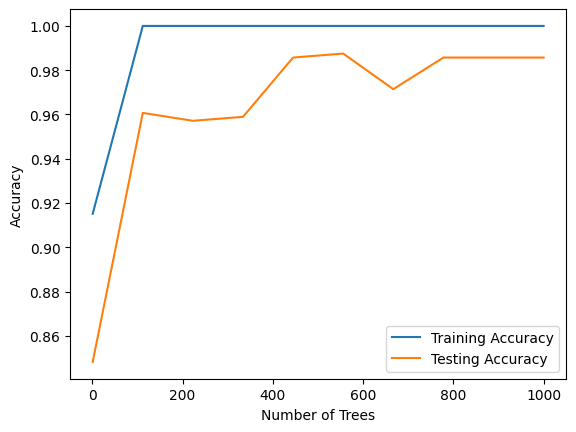

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import time

num_of_trees = np.linspace(1, 1000, 10, dtype=int)
score = []
train_accuracy = []
test_accuracy = []

for n in num_of_trees:
    tree = RandomForestClassifier(n_estimators=n)
    cv = StratifiedKFold(n_splits=10, shuffle=True)
    
    train_scores = []
    test_scores = []
    
    start_time = time.time()

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        tree.fit(X_train, y_train)
        
        train_scores.append(tree.score(X_train, y_train))
        test_scores.append(tree.score(X_test, y_test))

    train_accuracy.append(np.mean(train_scores))
    test_accuracy.append(np.mean(test_scores))

    print(f"Number of Trees: {n}, Train accuracy: {train_accuracy[-1]}, Test accuracy: {test_accuracy[-1]}")

    end_time = time.time()
    print(f"Time taken for {n} trees: {end_time - start_time} seconds")

plt.plot(num_of_trees, train_accuracy, label='Training Accuracy')
plt.plot(num_of_trees, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


We are see a bit overfitting after we have roughly 20 trees. This is because we have already hit our peak score on the testing data and all further trees are not contributing to the models ablitiy to accurately predict the data. This can cause problem in generalization

### Question 2

Compute the accuracy of a non-linear SVM with Gaussian kernel on the Leukemia dataset using ten-fold cross-validation with optimal hyperparameters chosen using nested cross-validation.
In your analysis perform model selection over the value of the soft-margin constant and the width parameter of the Gaussian kernel.  For each hyperparameter choose a wide enough range of values that makes sense.  
Compare the performance of the non-linear SVM to that of a linear SVM where you select an optimal value of the soft-margin constant, again using nested cross-validation.  Hint:  It is possible to get similar performance using the non-linear SVM.

Here are links to some of the notebooks from CS 345 where I presented SVMs and model selection:

*  Linear SVMs ([notebook](https://github.com/asabenhur/CS345/blob/master/fall24/notebooks/module02_04_svm.ipynb))
*  Non-linear SVMs and kernels ([notebook](https://github.com/asabenhur/CS345/blob/master/fall24/notebooks/module04_03_kernels.ipynb))
*  Model selection using a validation set ([notebook](https://github.com/asabenhur/CS345/blob/master/fall24/notebooks/module05_01_hyperparameters_validation_set.ipynb))
*  Model selection using nested cross-validation ([notebook](https://github.com/asabenhur/CS345/blob/master/fall24/notebooks/module05_03_model_selection.ipynb))


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits=10, shuffle=True)
param_grid_gaussian = [
  {'C': [0.1, 1, 10, 100, 1000], 
   'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1]},
 ]

param_grid_linear = [
  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
 ]

gaussian = GridSearchCV(svm.SVC(kernel='rbf'), param_grid_gaussian, cv=cv)
linear = GridSearchCV(svm.SVC(kernel='linear'), param_grid_linear, cv=cv)

linear.fit(X,y)
gaussian.fit(X, y)

print('guassian classifier: ', gaussian.best_params_)
print('linear classifier: ', linear.best_params_)

gaussian_accuracy = cross_val_score(gaussian, X, y, cv=cv, scoring='accuracy')
linear_accuracy = cross_val_score(linear, X, y, cv=cv, scoring='accuracy')

print('guassian accuracy: ', np.mean(gaussian_accuracy))
print('linear accuracy: ', np.mean(linear_accuracy))


guassian classifier:  {'C': 10, 'gamma': 0.0001}
linear classifier:  {'C': 0.1}


I got similar results for each of these dataset. I am fairly new to this style of machine learning but this indicates that the data is not incredibly complex and there are probably a few important genes that allow this simple classification to occur. This allow the model to quickly identifiy these genes with and without a gaussian kernel and acheive similar accuracy. Interestingly the parameters seem to be slightly stochastic and the model predicts between 1 and 10 for the C parameter. The simplicitiy of the data is demonstrated below


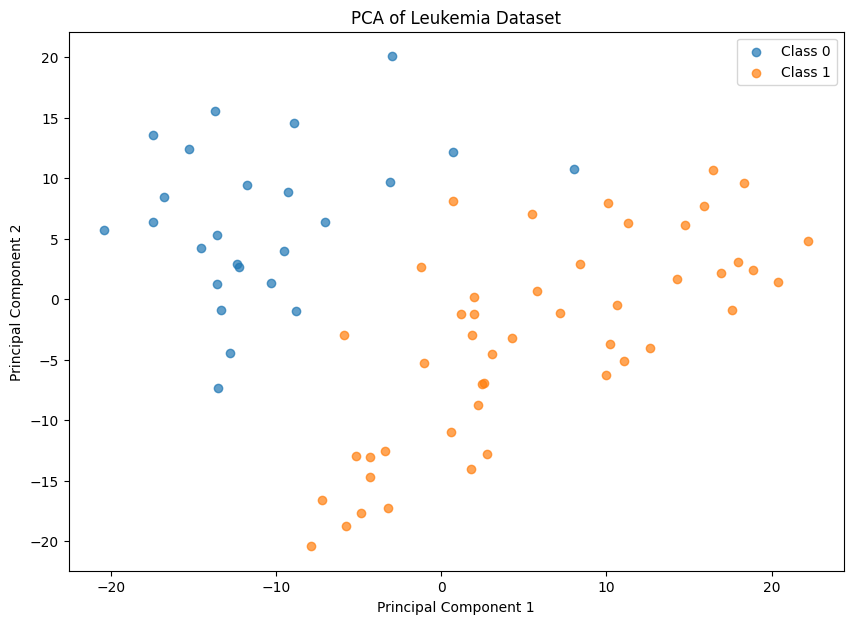

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Leukemia Dataset')
plt.legend()
plt.show()




In fact PCA is able to split the data very easily. This indicates that my hypothesis that the data is not very complex is correct. This is because simple eigen vectors are able to split the data accurately

In [8]:
import pandas as pd
# This is for fun
important_genes = []
eigenvalues = []

important_genes.append(np.argsort(pca.components_[0])[-3:])
important_genes.append(np.argsort(pca.components_[1])[-3:])
important_genes = np.array(important_genes)

eigenvalues.append(pca.components_[0][important_genes[0]])
eigenvalues.append(pca.components_[1][important_genes[1]])
eigenvalues = np.array(eigenvalues)

important_genes = important_genes.reshape(-1)
eigenvalues = eigenvalues.reshape(-1)

df_genes_importance = pd.DataFrame({
    'Gene': important_genes,
    'Importance': eigenvalues
})

print(df_genes_importance)


   Gene  Importance
0  4679    0.089597
1  4168    0.095034
2  2334    0.105996
3  2131    0.090839
4  2287    0.097461
5  4228    0.100894


These would be key genes to look at because these have the highest variance in the data